In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [19]:
plt.rc('font', size=20)          # text size
plt.rc('axes', titlesize=26)     # axes title size
plt.rc('axes', labelsize=24)     # axes label size
plt.rc('xtick', labelsize=20)    # x-tick label size
plt.rc('ytick', labelsize=20)    # y-tick label size
plt.rc('legend', fontsize=20)    # legend font size
plt.rc('figure', titlesize=26)   # figure title size

In [20]:
def extract_data(folder): # get data
    data_dict = {}
    
    for filename in os.listdir(folder):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder, filename)
            
            try:
                data = np.genfromtxt(file_path, delimiter=',', skip_header=8, usecols=(1, 2, 3))
                
                file_key = os.path.splitext(filename)[0]
                freq_var = f'{file_key}_freq_data'
                ch1_amp_var = f'{file_key}_ch1_amp_data'
                ch2_amp_var = f'{file_key}_ch2_amp_data'
                
                freq_data = data[:, 0]
                ch1_amp_data = data[:, 1]
                ch2_amp_data = data[:, 2]
                
                data_dict[freq_var] = freq_data
                data_dict[ch1_amp_var] = ch1_amp_data
                data_dict[ch2_amp_var] = ch2_amp_data
                
            except Exception as e:
                print(f'Error reading {filename}: {e}')
                
    return data_dict

def numeric_value_from_label(label): # used to put labels in numerical order in legends
    match = re.search(r'\d+', label)
    return float(match.group()) if match else None

folder = 'Data/4a-Rev/4a' 
data = extract_data(folder)

  
#data_headers = ['NoLoad244point4Hz', 'NoLoad488point28Hz', 'NoLoad61point04Hz', 
#               'Part2aDataResBW122Point07Hz', 'Part2aDataResBW244Point14Hz', 
#                'Part2aDataResBW488Point28Hz', 'Part2aDataResBW61Point04Hz',
#                'Part2aDataResBW7Point8Hz_highest_res']

data_headers = ['Part2aDataResBW7Point8kHz_highest_res', 'Part2aDataResBW7Point63Hz_lowest_res', 
                'Part2aDataResBW61Point04Hz', 'Part2aDataResBW488Point28Hz', 'Part2aDataResBW244Point14Hz', 
                'Part2aDataResBW122Point07Hz']  

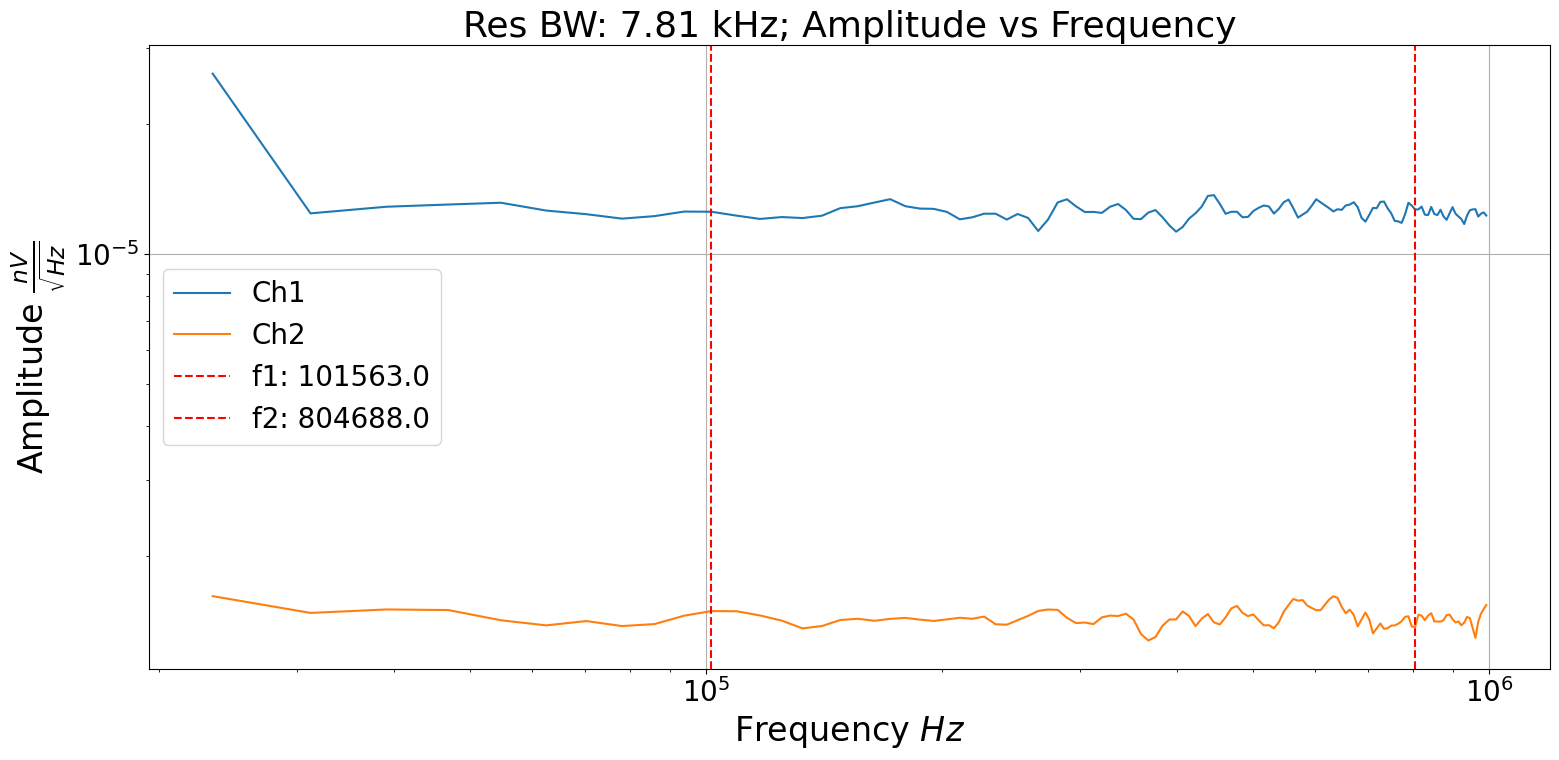

Ch1 white noise: 1.2571734444444444e-05
Ch2 white noise: 1.4420486666666667e-06


In [49]:
# ch1 was put in high mode
skip = 3
data_header = data_headers[0] 
title = f'Res BW: 7.81 kHz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 10
            white_noise_index2 = 100
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Ch1 white noise: {white_noise1}')
print(f'Ch2 white noise: {white_noise2}')

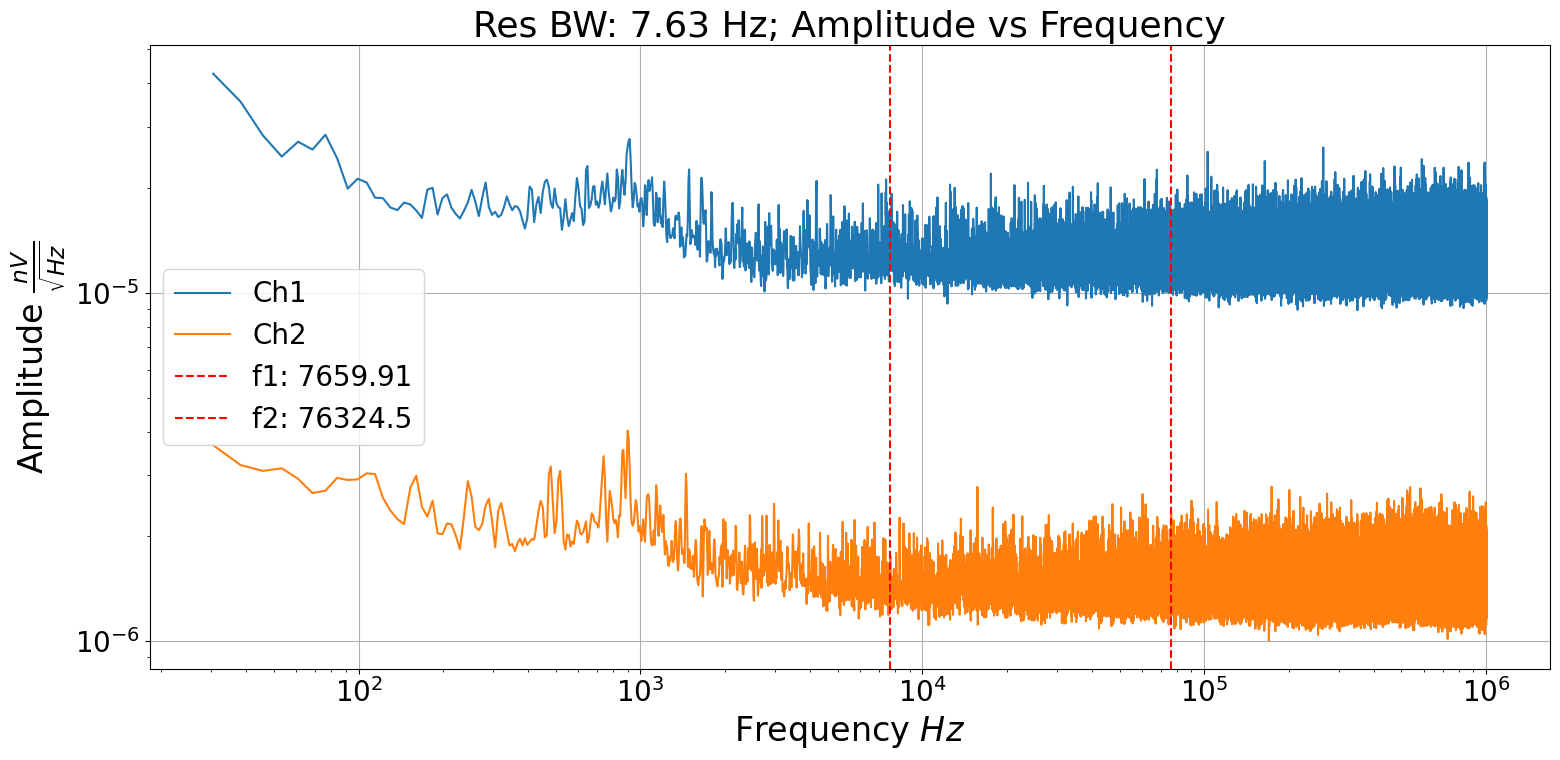

Ch1 white noise: 1.2596366409999998e-05
Ch2 white noise: 1.4526042822222222e-06


In [54]:
# ch1 was put in high mode
skip = 4
data_header = data_headers[1] 
#title = data_header
title = f'Res BW: 7.63 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 1000
            white_noise_index2 = 10000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Ch1 white noise: {white_noise1}')
print(f'Ch2 white noise: {white_noise2}')

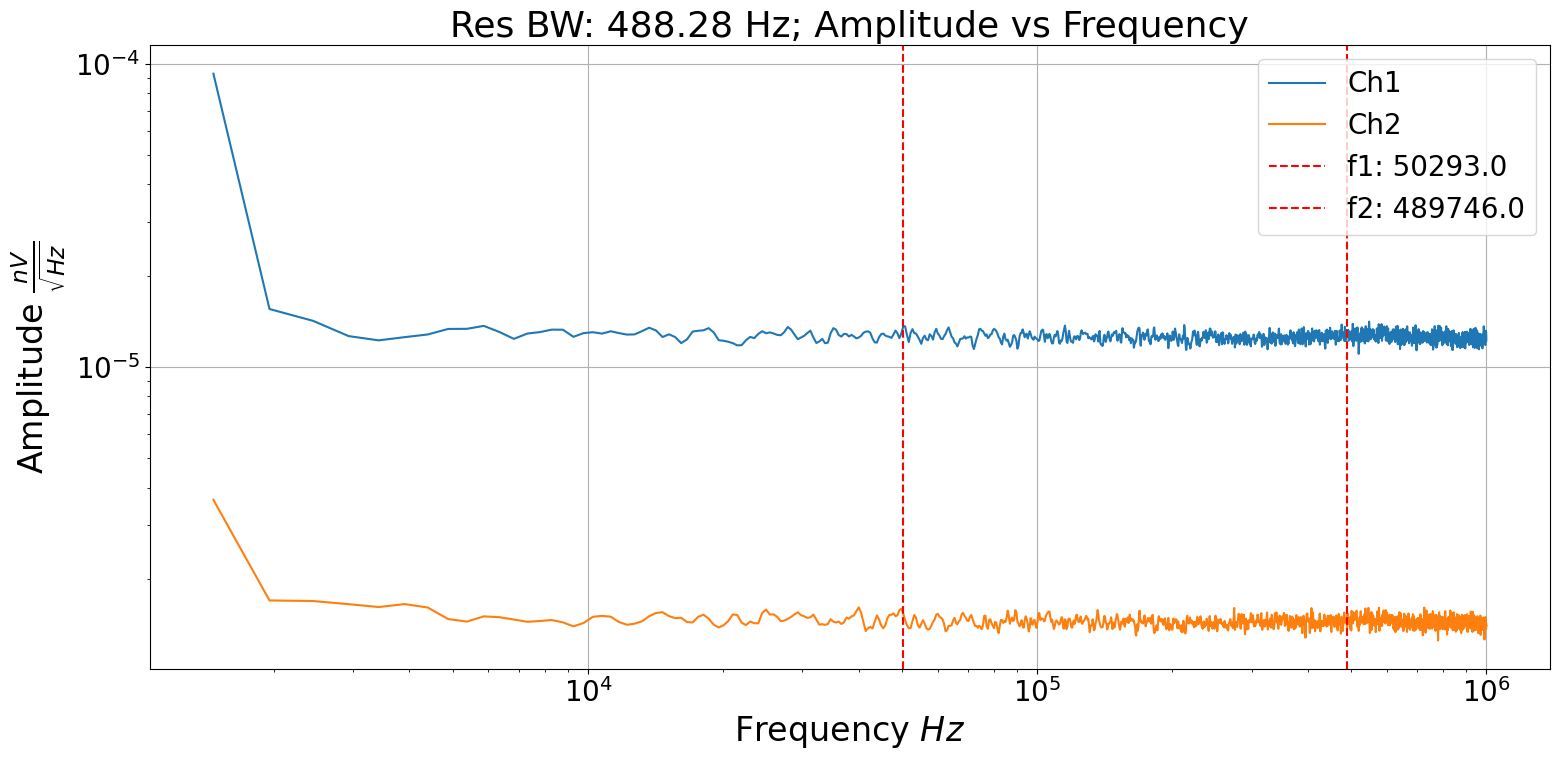

Ch1 white noise: 1.2528716777777778e-05
Ch2 white noise: 1.4379148e-06


In [47]:
# ch1 was put in high mode
skip = 3
data_header = data_headers[3] 
title = f'Res BW: 488.28 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 100
            white_noise_index2 = 1000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Ch1 white noise: {white_noise1}')
print(f'Ch2 white noise: {white_noise2}')

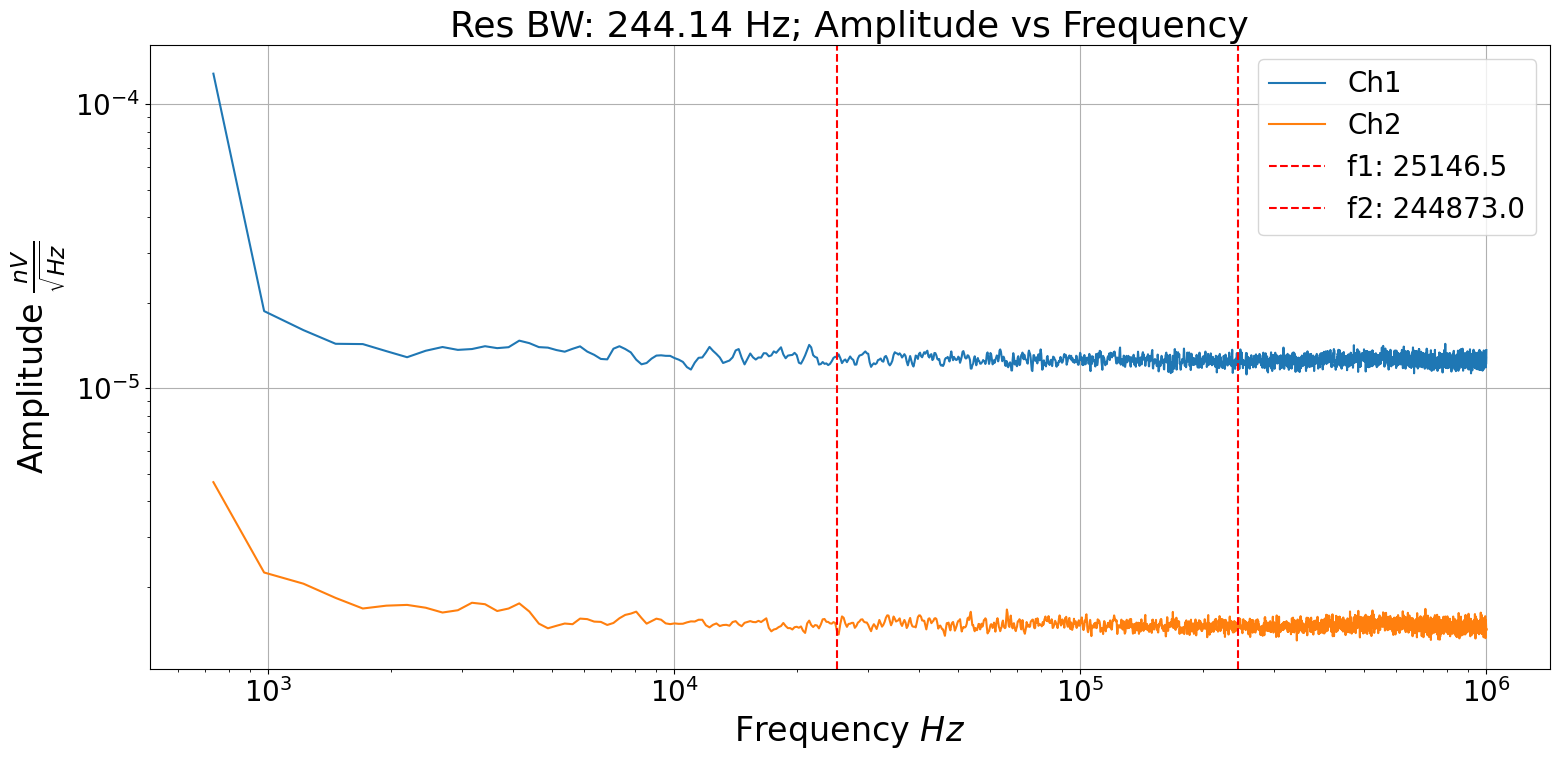

Ch1 white noise: 1.257955522222222e-05
Ch2 white noise: 1.4661369444444448e-06


In [56]:
# ch1 was put in high mode
skip = 3
data_header = data_headers[4] 
#title = data_header
title = f'Res BW: 244.14 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 100
            white_noise_index2 = 1000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Ch1 white noise: {white_noise1}')
print(f'Ch2 white noise: {white_noise2}')

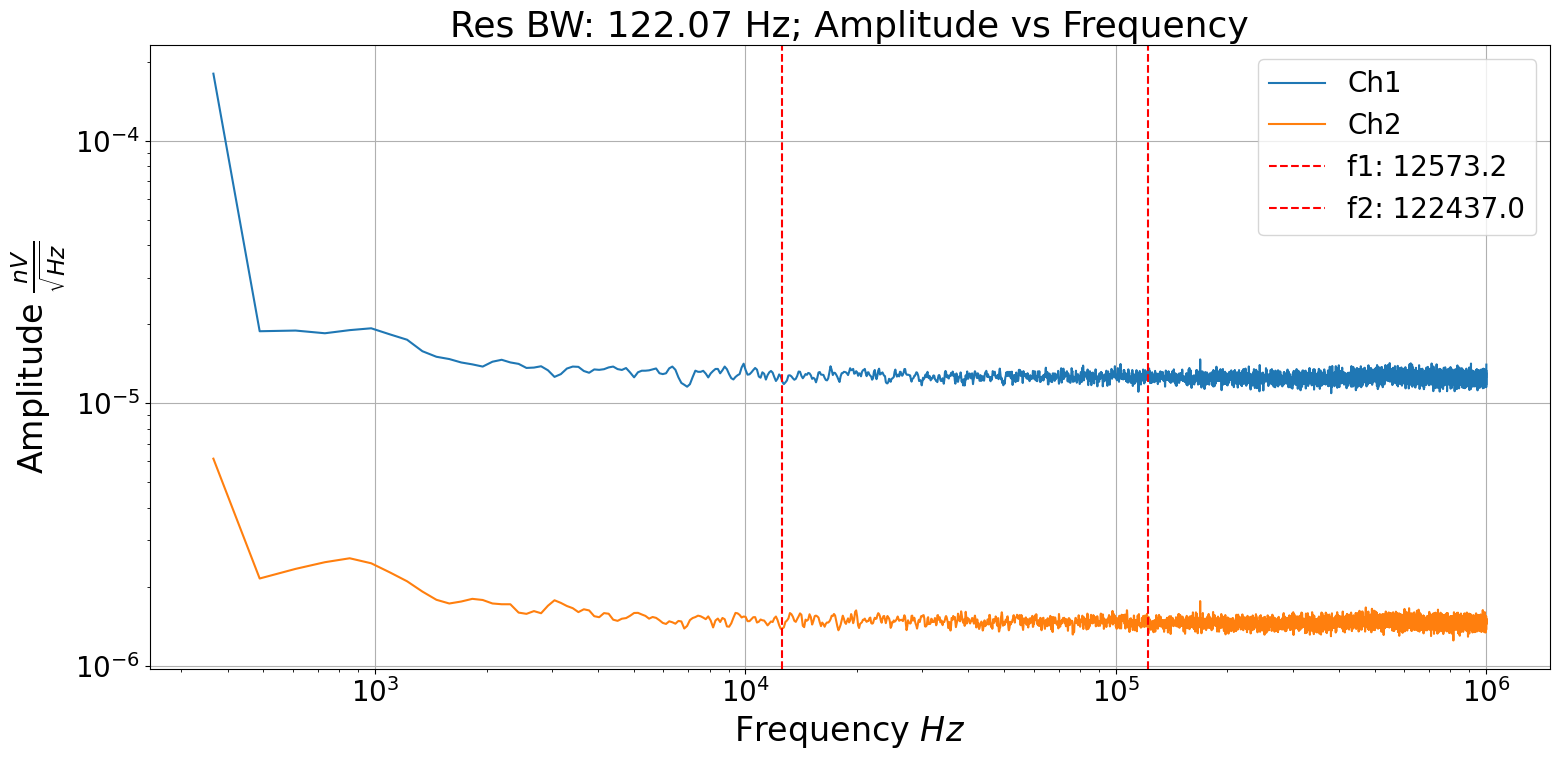

Ch1 white noise: 1.264907788888889e-05
Ch2 white noise: 1.4748370333333331e-06


In [58]:
# ch1 was put in high mode
skip = 3
data_header = data_headers[5] 
#title = data_header
title = f'Res BW: 122.07 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 100
            white_noise_index2 = 1000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Ch1 white noise: {white_noise1}')
print(f'Ch2 white noise: {white_noise2}')

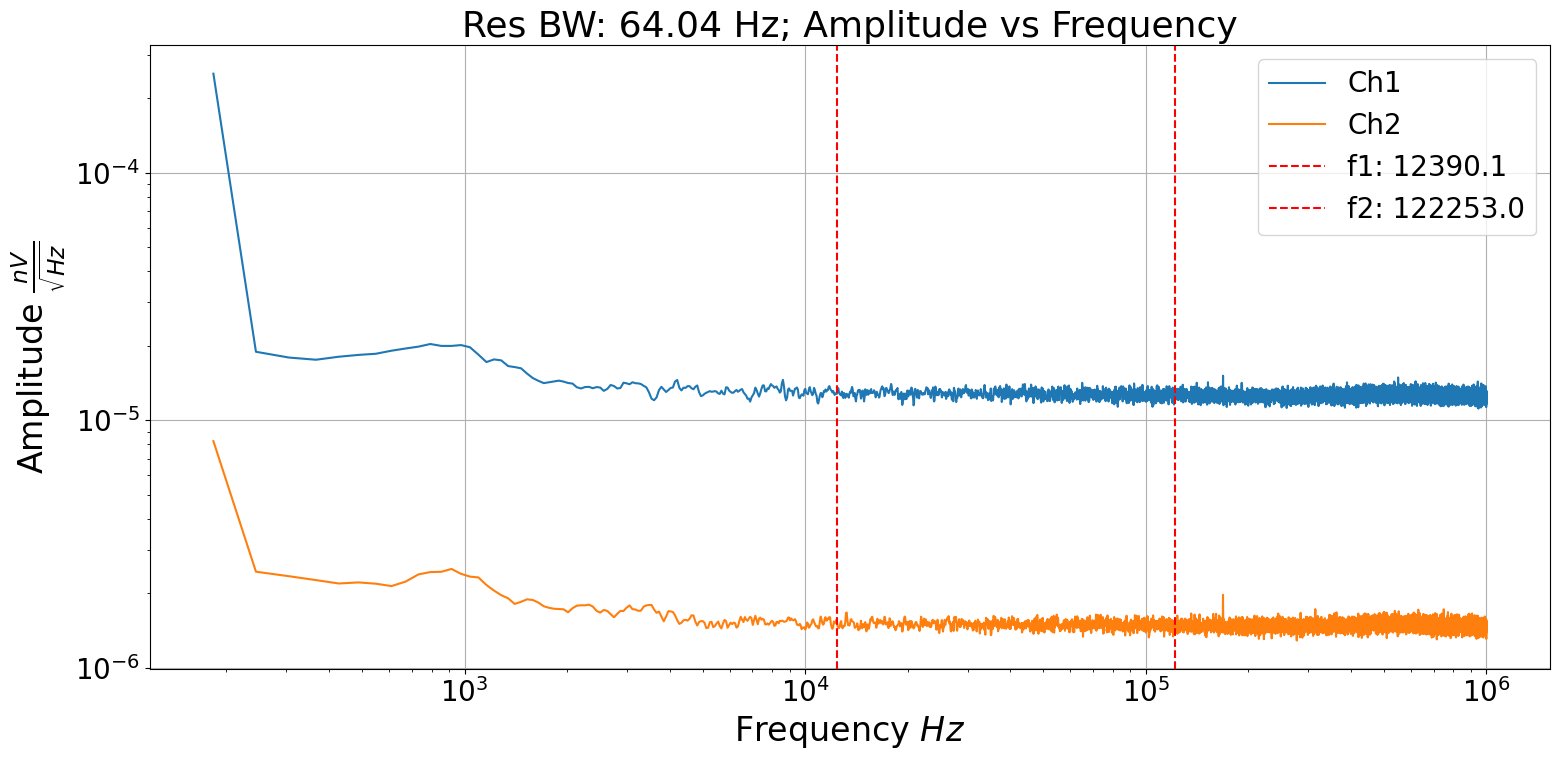

Ch1 white noise: 1.2733766555555554e-05
Ch2 white noise: 1.4940328666666664e-06


In [62]:
# ch1 was put in high mode
skip = 3
data_header = data_headers[2] 
#title = data_header
title = f'Res BW: 64.04 Hz'
v = 7

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        ch1_amp_key = f'{base_name}_ch1_amp_data'
        ch2_amp_key = f'{base_name}_ch2_amp_data'
        
        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            ch1_amp_data = data[ch1_amp_key]
            ch2_amp_data = data[ch2_amp_key]
            
            numeric_label = numeric_value_from_label(label_part)

            cut_freq_data = freq_data[skip:]
            cut_ch1_amp_data = ch1_amp_data[skip:]
            cut_ch2_amp_data = ch2_amp_data[skip:]
            
            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]
            
            white_noise_index1 = 200
            white_noise_index2 = 2000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]
            
            white_noise1 = np.mean(cut_ch1_amp_data[white_noise_index1:white_noise_index2])
            white_noise2 = np.mean(cut_ch2_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'numeric_label': numeric_label,
                'freq_data': cut_freq_data,
                'ch1_amp_data': cut_ch1_amp_data,
                'ch2_amp_data': cut_ch2_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise1': white_noise1,
                'white_noise2': white_noise2
            })

entries = sorted(entries, key=lambda x: x['numeric_label'])

plt.figure(figsize=(16, 8))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['ch1_amp_data'], label=f'Ch1')
    line, = plt.plot(entry['freq_data'], entry['ch2_amp_data'], label=f'Ch2')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--', label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--', label=f"f2: {white_noise_freq2}")
#plt.axvline(corner_freq, color='red', linestyle='--', label=f"Corner Frequency ~{corner_freq:.2f} Hz")
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{nV}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Ch1 white noise: {white_noise1}')
print(f'Ch2 white noise: {white_noise2}')